Modified from base code from IBM Coursera: Machine Learning with Python

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import requests

# store url of dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv' 
# Create requests variable 
r = requests.get(url, allow_redirects=True)
# Write content of request to 'china_gdp.csv' file
open('china_gdp.csv', 'wb').write(r.content)

1218

In [19]:
df = pd.read_csv("china_gdp.csv")

# take a look at the dataset
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plot dataset

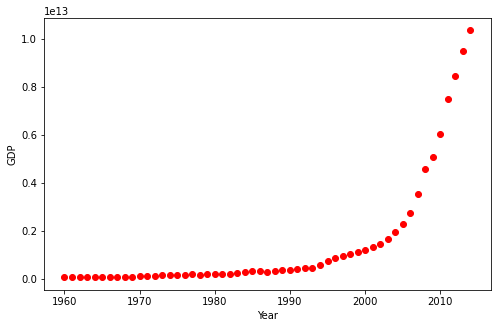

In [20]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Build model, optimize parameters

In [21]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [22]:
# normalize data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [23]:
# optimize parameters
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


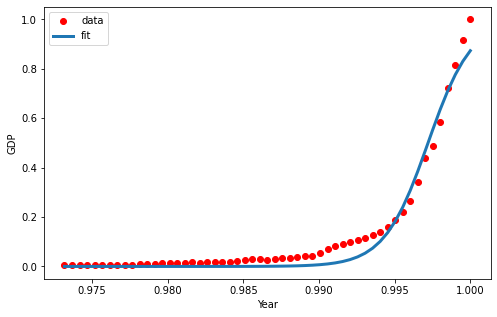

In [24]:
# plot regression model
x = np.linspace(min(x_data), max(x_data), max(x_data)-min(x_data) + 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Calculate model accuracy

In [25]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [26]:
# build model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

In [27]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
